# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

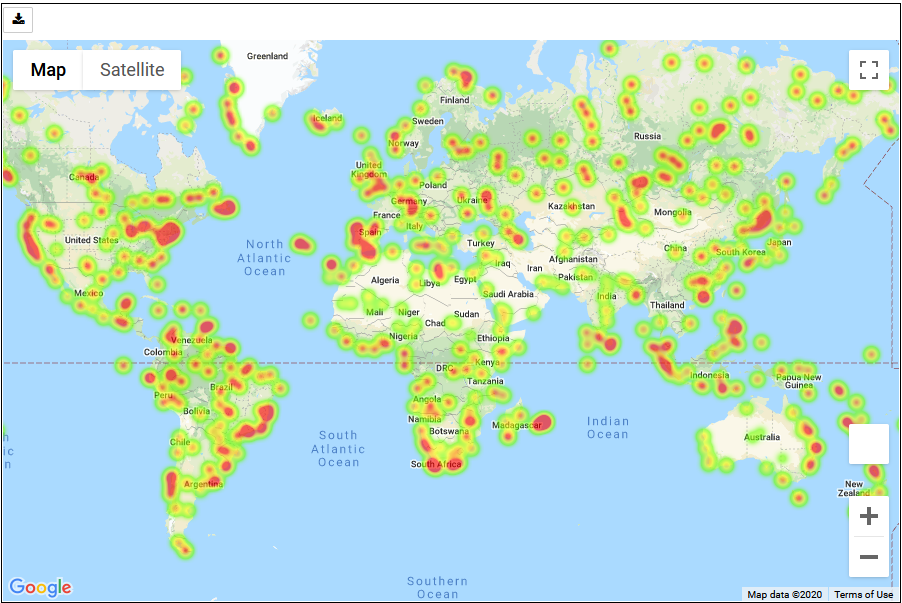

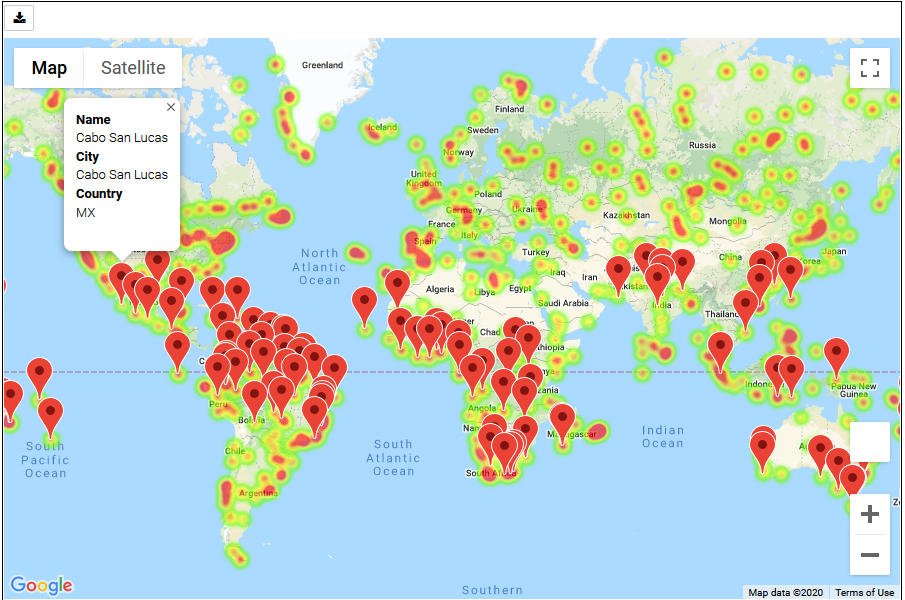

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import csv
# Import API key
from api_keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [11]:

main_df = pd.read_csv("Output/Cities.csv", encoding="utf-8")
main_df

City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0      Mahébourg -20.41   57.70     80.60        65          20        6.93   
1      Busselton -33.65  115.33     75.99        42          57       14.20   
2          Pevek  69.70  170.31     12.45        97          98        4.88   
3        Rikitea -23.12 -134.97     72.81        65          71        6.53   
4         Avarua -21.21 -159.78     77.00        83          98        3.36   
..           ...    ...     ...       ...       ...         ...         ...   
567  Kaberamaido   1.74   33.16     75.40        76          35        1.70   
568  Belaya Gora  68.53  146.42     -9.18        91          94        3.36   
569       Suntar  62.14  117.63      9.93        93         100        6.49   
570      Binzhou  37.37  118.02     40.32        92         100        7.63   
571        Solok  -0.79  100.66     78.66        77         100        1.86   

    Country        Date  
0        MU  1605939733  
1        AU  1605939733  
2        RU  1605939733  
3        PF  1605939733  
4        CK  1605939734  
..      ...         ...  
567      UG  1605939951  
568      RU  1605939952  
569      RU  1605939952  
570      CN  1605939672  
571      ID  1605939952  

[572 rows x 9 columns]

### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [12]:
# Configure gmaps
gmaps.configure(api_key=g_key)

In [13]:
# Store latitude and longitude in locations
locations = main_df[["Lat", "Lng"]]

# Fill NaN values and convert to float
humidity = main_df["Humidity"].astype(float)
maxhumidity = humidity.max()


In [17]:
# Plot Heatmap
figure_layout = {
    'width': '900px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'}
    
# Use the gmaps.figure passing a zoom_level of 2 and a center point so the map displays properly at
# a readable size

#fig = gmaps.figure(center=(46.0, -5.0), zoom_level=2)

fig = gmaps.figure(layout=figure_layout, zoom_level=2, center=(15,25))    
    
    

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, point_radius=3, max_intensity=maxhumidity)



# Add layer
fig.add_layer(heat_layer)


# Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [18]:
# Choose a criteria to narrow down the cities. Ex: The perfect vacation climate
# A max temperature lower than 80 degrees but higher than 70.

fav_city_df = main_df.loc[(main_df["Max Temp"] < 80) & (main_df["Max Temp"] > 70) & (main_df["Wind Speed"] < 15), :]

fav_city_df = fav_city_df.dropna(how='any')

fav_city_df.reset_index(inplace=True)

del fav_city_df['index']

fav_city_df.head()

City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0  Busselton -33.65  115.33     75.99        42          57       14.20   
1    Rikitea -23.12 -134.97     72.81        65          71        6.53   
2     Avarua -21.21 -159.78     77.00        83          98        3.36   
3     Hobart -42.88  147.33     73.99        52          75       12.75   
4     Atuona  -9.80 -139.03     77.85        77          23       13.24   

  Country        Date  
0      AU  1605939733  
1      PF  1605939733  
2      CK  1605939734  
3      AU  1605939734  
4      PF  1605939737

### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [19]:
hotels = []

for index, row in fav_city_df.iterrows():
    # get lat, lng from hotel_df
    lat = row["Lat"]
    lng = row["Lng"]

# for i in range(len(fav_city_df)):
#     lat = fav_city_df.loc[i]['Lat']
#     lng = fav_city_df.loc[i]['Lng']

    params = {
        "location": f"{lat},{lng}",
        "radius": 5000,
        "types" : "hotel",
        "key": g_key
    }
    
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    response = requests.get(base_url, params=params)
    response_json = response.json()
    try:
        hotels.append(response_json['results'][0]['name'])
    except:
        hotels.append("")
fav_city_df["Hotel Name"] = hotels
fav_city_df = fav_city_df.dropna(how='any')
fav_city_df.head()

City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0  Busselton -33.65  115.33     75.99        42          57       14.20   
1    Rikitea -23.12 -134.97     72.81        65          71        6.53   
2     Avarua -21.21 -159.78     77.00        83          98        3.36   
3     Hobart -42.88  147.33     73.99        52          75       12.75   
4     Atuona  -9.80 -139.03     77.85        77          23       13.24   

  Country        Date       Hotel Name  
0      AU  1605939733        Busselton  
1      PF  1605939733          Rikitea  
2      CK  1605939734  Avarua District  
3      AU  1605939734           Hobart  
4      PF  1605939737           Atuona

In [20]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in fav_city_df.iterrows()]
locations = fav_city_df[["Lat", "Lng"]]

In [21]:
# Add marker layer ontop of heat map
hotel_markers = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(hotel_markers)


# Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…